### Quest
- apply() : '신장', '체중' -> BMI
- BMI 시각화 및 인사이트 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')

In [3]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
# 필요한 변수만 추출
df_ROS_extract =df_ROS[['환자ID','신장','체중']]
df_ROS_extract[:2]

,환자ID,신장,체중
0,1PT,163,60.3
1,2PT,171,71.7


In [8]:
df_ROS['신장'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 신장
Non-Null Count  Dtype
--------------  -----
1894 non-null   int64
dtypes: int64(1)
memory usage: 14.9 KB


In [13]:
df_ROS['체중'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1894 entries, 0 to 1893
Series name: 체중
Non-Null Count  Dtype  
--------------  -----  
1894 non-null   float64
dtypes: float64(1)
memory usage: 14.9 KB


In [41]:
def calculate_bmi(체중, 신장):
    return 체중 / (신장 / 100) ** 2

In [43]:
df_ROS['BMI'] = df_ROS.apply(lambda row: calculate_bmi(row['체중'], row['신장']), axis=1)
df_ROS['BMI'] 

0       22.695623
1       24.520365
2       24.334049
3       24.507861
4       24.097465
          ...    
1889    25.964542
1890    23.936062
1891    25.099502
1892    24.577867
1893    17.361111
Name: BMI, Length: 1894, dtype: float64

In [44]:
df_ROS['BMI'].describe()    

count    1894.000000
mean       24.035520
std         2.829173
min        14.479500
25%        22.414666
50%        24.163444
75%        24.968010
max        48.221372
Name: BMI, dtype: float64

In [50]:
def bmi_categori(bmi):
    if bmi < 18.5:
        return "저체중"
    elif 18.5 <= bmi < 24.9:
        return "정상 체중"
    elif 25 <= bmi < 29.9:
        return "과체중"
    else:
        return "비만"

In [59]:
df_ROS['BMI_categori'] = df_ROS['BMI'].apply(bmi_categori)
df_ROS['BMI_categori']

0       정상 체중
1       정상 체중
2       정상 체중
3       정상 체중
4       정상 체중
        ...  
1889      과체중
1890    정상 체중
1891      과체중
1892    정상 체중
1893      저체중
Name: BMI_categori, Length: 1894, dtype: object

In [77]:
df_ROS['성별'] = df_ROS['성별'].replace({1: '남성', 2: '여성'})

In [86]:
df_ROS[['환자ID','성별','신장','체중', 'BMI','BMI_categori']]

,환자ID,성별,신장,체중,BMI,BMI_categori
0,1PT,여성,163,60.3,22.695623,정상 체중
1,2PT,남성,171,71.7,24.520365,정상 체중
2,3PT,남성,178,77.1,24.334049,정상 체중
3,4PT,남성,174,74.2,24.507861,정상 체중
4,5PT,남성,183,80.7,24.097465,정상 체중
...,...,...,...,...,...,...
1889,1890PT,여성,157,64.0,25.964542,과체중
1890,1891PT,여성,157,59.0,23.936062,정상 체중
1891,1892PT,남성,167,70.0,25.099502,과체중
1892,1893PT,남성,177,77.0,24.577867,정상 체중


#### bmi 종류 : 종류중에 정상체중 비율이 가장 많음

<Axes: xlabel='BMI_categori'>

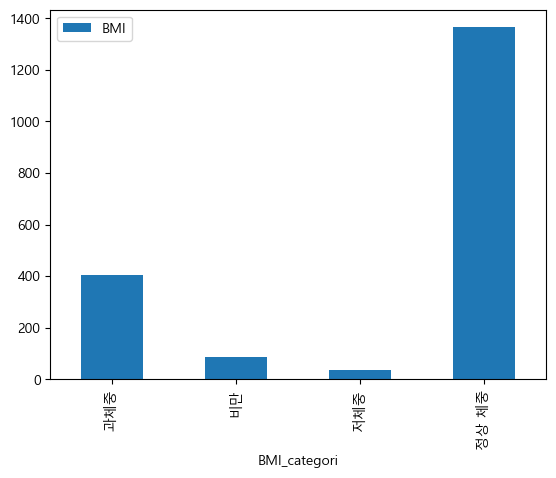

In [81]:
pd.pivot_table(data=df_ROS[['BMI', 'BMI_categori']], index='BMI_categori', aggfunc=len).plot(kind='bar')

#### 성별 bmi 지수 : 남성이 비만,과체중,정상체중 비율이 더 높다

Text(0.5, 1.0, '성별 BMI 지수')

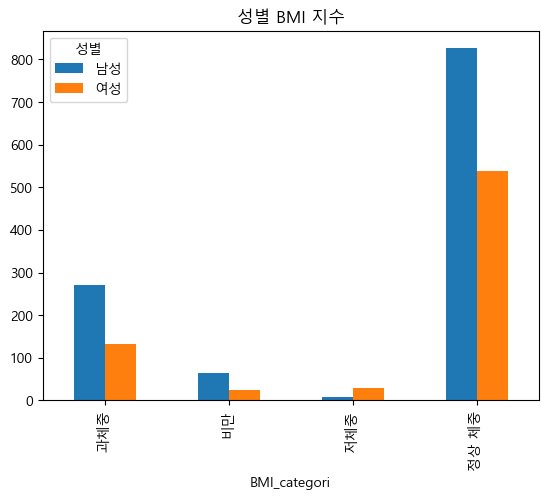

In [80]:
pd.pivot_table(data=df_ROS, values='BMI', index='BMI_categori', columns='성별', aggfunc=len).plot(kind='bar')
plt.title('성별 BMI 지수')